<a href="https://colab.research.google.com/github/ELRHAOUAT/Data_minig/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Generate clustering data*

In [13]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame

X_train, _ = make_blobs(n_samples=500, centers=5, n_features=2, random_state=20)

## *Visualize the data*

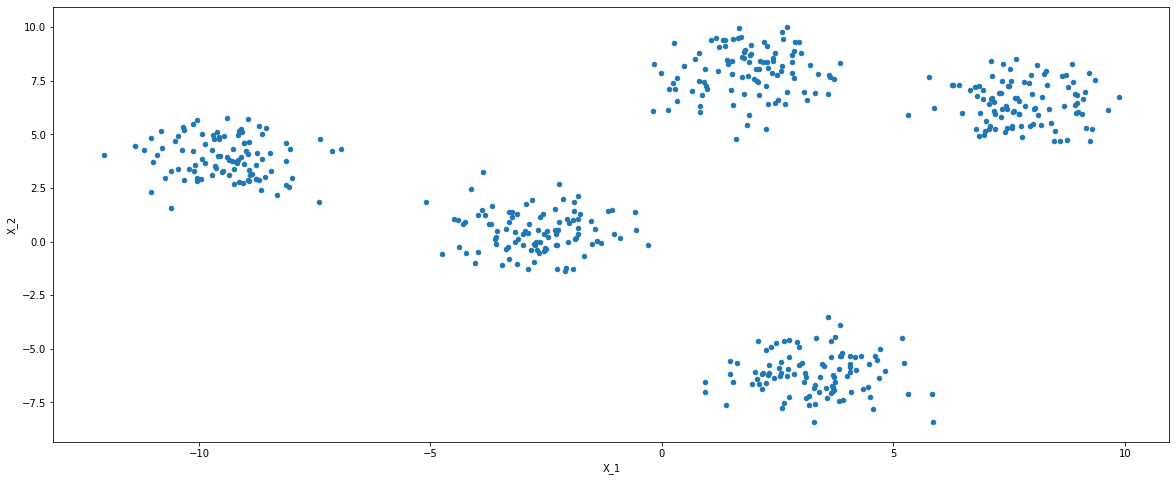

In [56]:
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1]))
fig, ax = plt.subplots(figsize=(20,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

## *Helper functions for K-means*

In [62]:
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)
    

In [16]:
def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

In [17]:
def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

In [18]:
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

In [19]:
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

In [34]:
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green', 3:'magenta', 4:'yellow'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key,
                   color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

## *K-means*

[[-3.516741776704656, 7.841246299815525]]
[[-3.516741776704656, 7.841246299815525], [-9.694179574434543, 3.548444524892796]]
[[-3.516741776704656, 7.841246299815525], [-9.694179574434543, 3.548444524892796], [8.907055704617397, -7.279118717292655]]
[[-3.516741776704656, 7.841246299815525], [-9.694179574434543, 3.548444524892796], [8.907055704617397, -7.279118717292655], [0.1596224274829634, -5.558574837757497]]
[[-3.516741776704656, 7.841246299815525], [-9.694179574434543, 3.548444524892796], [8.907055704617397, -7.279118717292655], [0.1596224274829634, -5.558574837757497], [-8.707755464310255, 6.815940899514462]]


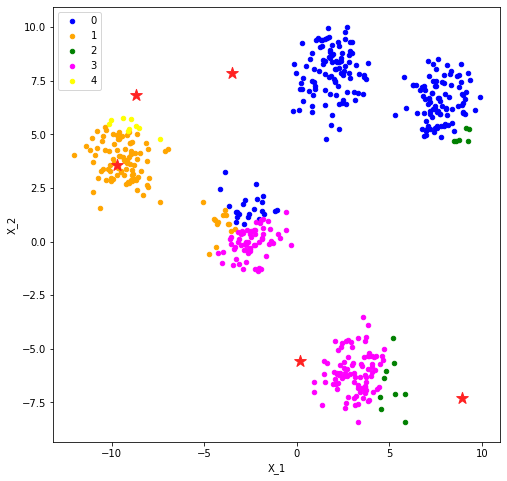

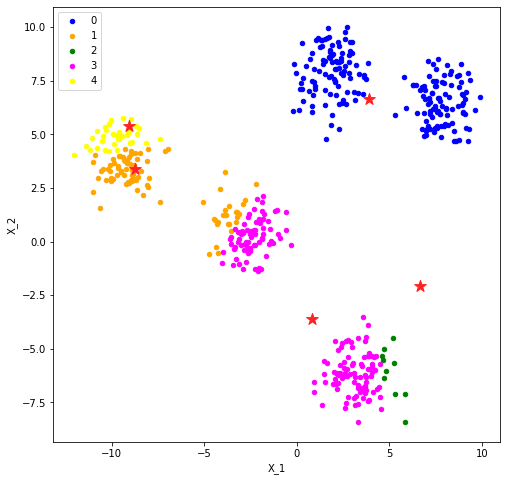

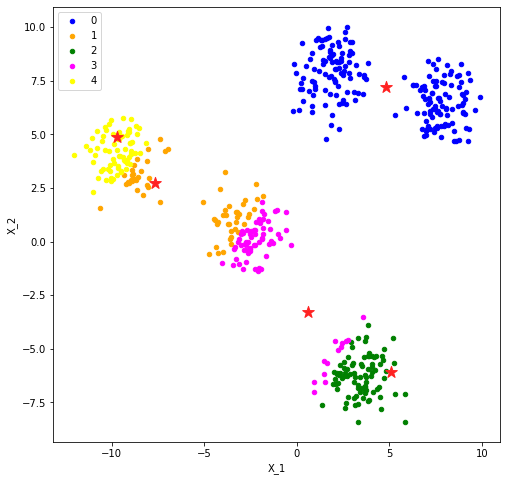

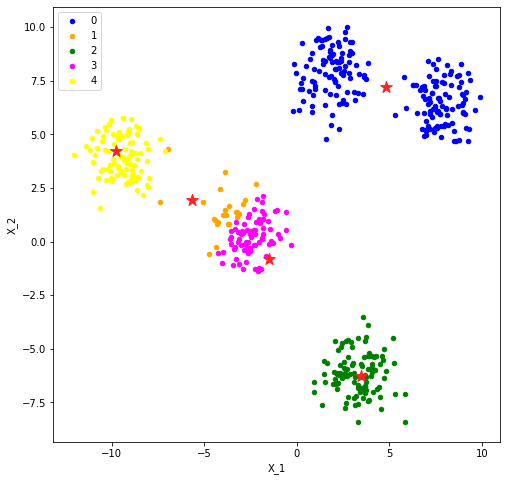

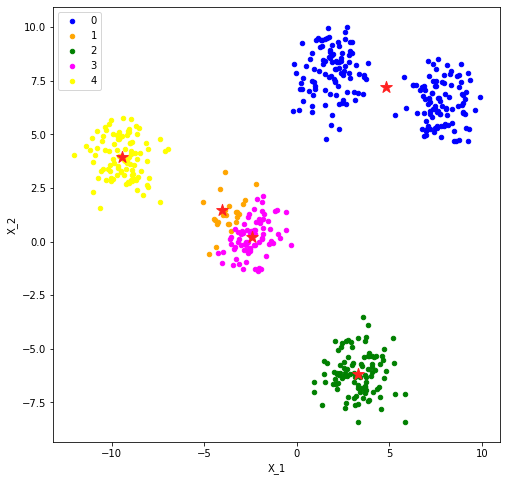

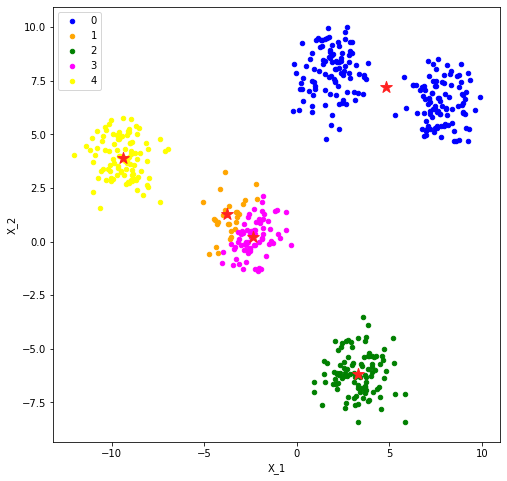

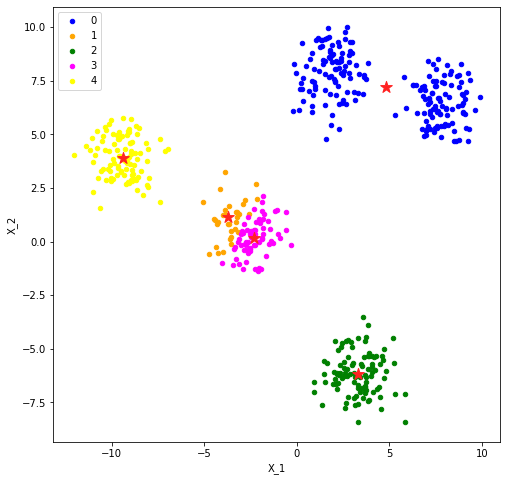

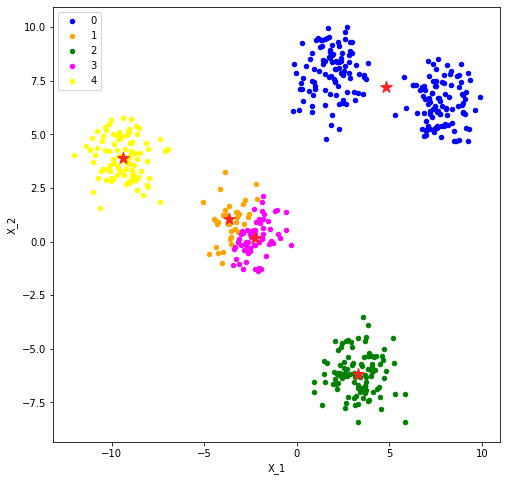

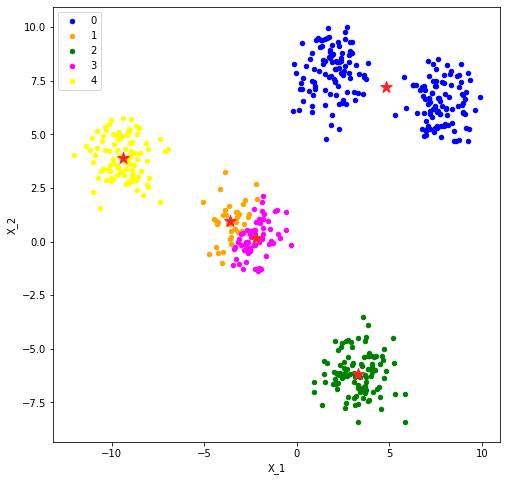

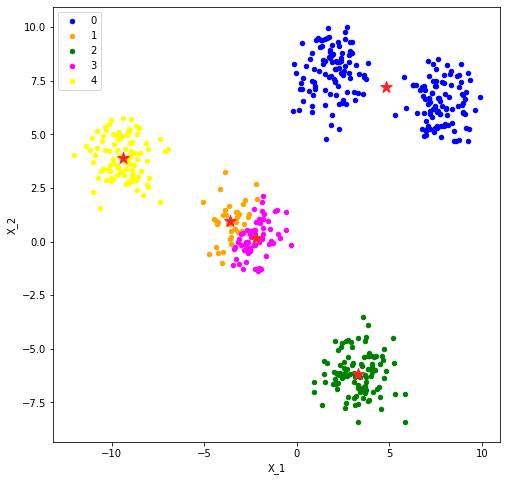

In [61]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.0001:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

cluster = k_means(5, X_train)